## Tratamento de dados e uso de modelo de Machine Learning
### Fonte dos dados: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset
### Autor do notebook: Giulian Smith Araújo Monteiro

In [1]:
#Importando as bibliotecas necessárias e visualizando os dados brutos
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('players_22.csv')
df.head()

C:\Users\ok\AppData\Local\Temp\ipykernel_10500\1945261182.py:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [6]:
#Primeiro vamos reduzir o número de colunas
x=df.columns
print(x)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)


In [2]:
df=df.drop(['sofifa_id','player_url','long_name','player_face_url','club_logo_url','nation_logo_url','nation_flag_url'],axis=1)
df.columns

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,club_flag_url
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,...,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/flags/fr.png
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/flags/de.png
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,...,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/flags/gb-eng.png
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,...,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/flags/fr.png
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,...,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/flags/gb-eng.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,64,...,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/flags/cn.png
19235,C. Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,...,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/flags/ie.png
19236,N. Logue,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,...,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/flags/ie.png
19237,L. Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,66,...,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/flags/ie.png


In [3]:
df=df.drop(['cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','club_flag_url'],axis=1)
df.columns

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,...,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,...,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,...,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,...,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,...,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,...,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,64,...,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,46+2
19235,C. Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,...,47+2,47+2,47+2,49+2,47+2,47+2,47+2,49+2,49+2,46+2
19236,N. Logue,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,...,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,46+2
19237,L. Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,66,...,45+2,45+2,45+2,45+2,39+2,39+2,39+2,45+2,33+2,29+2


In [4]:
df=df.drop(['skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm'],axis=1)
df

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,...,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,...,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,...,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,...,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,...,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right,5
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,70,...,NaN,2015-08-30,2025.0,7,Belgium,1325.0,RCM,7.0,Right,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,64,...,NaN,2021-04-01,2021.0,155,China PR,NaN,NaN,NaN,Right,3
19235,C. Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,70,...,NaN,2021-02-22,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3
19236,N. Logue,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,...,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3
19237,L. Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,66,...,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3


In [16]:
df.to_csv('fifa22_tratado.csv')

### Daqui já posso criar o dashboard que postei no meu linkedin. 
### Link da postagem: shorturl.at/kENQS
### Em seguida, o tratamento dos dados para a criação de um modelo de ML continua

In [47]:
dfml=df.drop(['short_name','dob','club_name','league_name','club_position','club_loaned_from','club_joined',
              'nationality_name','nation_team_id','nation_position','nation_jersey_number','weak_foot'], axis=1)

In [7]:
dfml.info() #Verificando os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_positions           19239 non-null  object 
 1   overall                    19239 non-null  int64  
 2   potential                  19239 non-null  int64  
 3   value_eur                  19165 non-null  float64
 4   wage_eur                   19178 non-null  float64
 5   age                        19239 non-null  int64  
 6   height_cm                  19239 non-null  int64  
 7   weight_kg                  19239 non-null  int64  
 8   club_team_id               19178 non-null  float64
 9   league_level               19178 non-null  float64
 10  club_jersey_number         19178 non-null  float64
 11  club_contract_valid_until  19178 non-null  float64
 12  nationality_id             19239 non-null  int64  
 13  preferred_foot             19239 non-null  obj

In [48]:
labelencoder = LabelEncoder()
dfml['player_positions']=labelencoder.fit_transform(dfml['player_positions'])
dfml['preferred_foot']=labelencoder.fit_transform(dfml['preferred_foot'])

In [10]:
dfml.isna().sum()

player_positions              0
overall                       0
potential                     0
value_eur                    74
wage_eur                     61
age                           0
height_cm                     0
weight_kg                     0
club_team_id                 61
league_level                 61
club_jersey_number           61
club_contract_valid_until    61
nationality_id                0
preferred_foot                0
dtype: int64

In [49]:
#Removendo valores faltantes
dfml=dfml.dropna()
dfml

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,preferred_foot
0,604,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,30.0,2023.0,52,0
1,635,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,9.0,2023.0,37,1
2,658,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,7.0,2023.0,38,1
3,372,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,10.0,2025.0,54,1
4,168,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,17.0,2025.0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,98,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,36.0,2021.0,155,1
19235,167,47,59,110000.0,500.0,19,175,70,445.0,1.0,27.0,2021.0,25,1
19236,167,47,55,100000.0,500.0,21,178,72,111131.0,1.0,31.0,2021.0,25,1
19237,635,47,60,110000.0,500.0,19,173,66,111131.0,1.0,12.0,2021.0,25,1


## Objetivo do modelo de ML: Prever o valor aproximado (em euros) de um jogador a partir de seus atributos

### O primeiro passo a seguir é dividir os valores em intervalos com números semelhantes de jogadores

In [12]:
dfml.describe() #Vou usar os quartis de value_eur para dividir os intervalos

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,preferred_foot
count,19165.000000,19165.000000,19165.000000,1.916500e+04,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,284.878894,65.760188,71.079990,2.850452e+06,9021.721889,25.190034,181.290008,74.930342,50540.725228,1.354239,20.948291,2022.764780,58.579233,0.762640
std,207.729404,6.882803,6.087721,7.613700e+06,19476.005074,4.727515,6.862654,7.066639,54398.739305,0.747572,17.912377,1.213179,50.238270,0.425476
min,0.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,0.000000
25%,104.000000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1.000000
50%,241.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,18.000000,2022.000000,45.000000,1.000000
75%,460.000000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,27.000000,2024.000000,60.000000,1.000000
max,673.000000,93.000000,95.000000,1.940000e+08,350000.000000,43.000000,206.000000,110.000000,115820.000000,5.000000,99.000000,2031.000000,219.000000,1.000000


In [57]:
#Criando a coluna com os intervalos
dfml.loc[dfml['value_eur']< 475000,'value_range']='less than 475k'
dfml.loc[(dfml['value_eur']>= 475000 )& (dfml['value_eur']<975000),'value_range']='475k to 975k'
dfml.loc[(dfml['value_eur']>= 975000 )& (dfml['value_eur']<2000000),'value_range']='975k to 2M'
dfml.loc[dfml['value_eur']>= 2000000,'value_range']='more than 2M'
dfml
                                                             

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,preferred_foot,value_range
0,604,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,30.0,2023.0,52,0,more than 2M
1,635,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,9.0,2023.0,37,1,more than 2M
2,658,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,7.0,2023.0,38,1,more than 2M
3,372,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,10.0,2025.0,54,1,more than 2M
4,168,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,17.0,2025.0,7,1,more than 2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,98,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,36.0,2021.0,155,1,less than 475k
19235,167,47,59,110000.0,500.0,19,175,70,445.0,1.0,27.0,2021.0,25,1,less than 475k
19236,167,47,55,100000.0,500.0,21,178,72,111131.0,1.0,31.0,2021.0,25,1,less than 475k
19237,635,47,60,110000.0,500.0,19,173,66,111131.0,1.0,12.0,2021.0,25,1,less than 475k


In [59]:
#Removendo a coluna com o valor exato dos jogadores
dfm=dfml.drop(['value_eur'],axis=1)

In [60]:
#Mostrando quantos jogadores tem em cada intervalo
dfm.groupby('value_range').count()

,player_positions,overall,potential,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,preferred_foot
value_range,,,,,,,,,,,,,
475k to 975k,5040,5040,5040,5040,5040,5040,5040,5040,5040,5040,5040,5040,5040
975k to 2M,4710,4710,4710,4710,4710,4710,4710,4710,4710,4710,4710,4710,4710
less than 475k,4441,4441,4441,4441,4441,4441,4441,4441,4441,4441,4441,4441,4441
more than 2M,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974


In [63]:
#Separando colunas preditoras da coluna alvo
preditores = dfm.drop(['value_range'],axis=1).values
target= dfm['value_range'].values

In [91]:
#Divisão em treino e teste
X_treino,x_teste,Y_treino,y_teste=train_test_split(preditores,target,test_size=0.3,random_state=1111)

In [92]:
#Usando o classificador Random Forest
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treino, Y_treino)

RandomForestClassifier()

In [93]:
#Fazendo as previsões
previsoes = floresta.predict(x_teste)
cm = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.9457391304347826

In [94]:
#Organizando a matriz de confusão para gerar um plot
mat=pd.DataFrame(cm,index=['less than 475k','475k to 975k','975k to 2M','more than 2M'],
                 columns=['less than 475k','475k to 975k','975k to 2M','more than 2M'])
mat

,less than 475k,475k to 975k,975k to 2M,more than 2M
less than 475k,1447,60,33,3
475k to 975k,61,1294,1,34
975k to 2M,82,0,1247,0
more than 2M,0,38,0,1450


C:\Users\ok\AppData\Local\Temp\ipykernel_10500\1393008152.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fifaml.png',dpi=300,bbox_to_inches='tight')


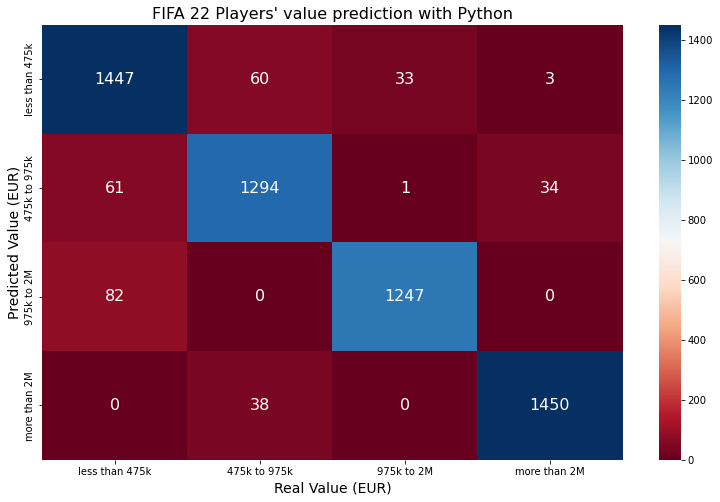

In [95]:
plt.figure(figsize = (13,8))
sns.heatmap(mat, annot=True,fmt='g',cmap='RdBu',annot_kws={"size": 16})
plt.xlabel('Real Value (EUR)',fontsize=14)
plt.ylabel('Predicted Value (EUR)',fontsize=14)
plt.title("FIFA 22 Players' value prediction with Python",fontsize=16)
plt.savefig('fifaml.png',dpi=300,bbox_to_inches='tight')